<a href="https://colab.research.google.com/github/Colecgame/Colecgame/blob/main/Desafio_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para upload de arquivos no Colab
from google.colab import files

# Bibliotecas para modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Upload do arquivo CSV
uploaded = files.upload()

Saving dados_concreto - Sheet1.csv to dados_concreto - Sheet1 (13).csv


In [ ]:
df = pd.read_csv('dados_concreto - Sheet1.csv')

df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


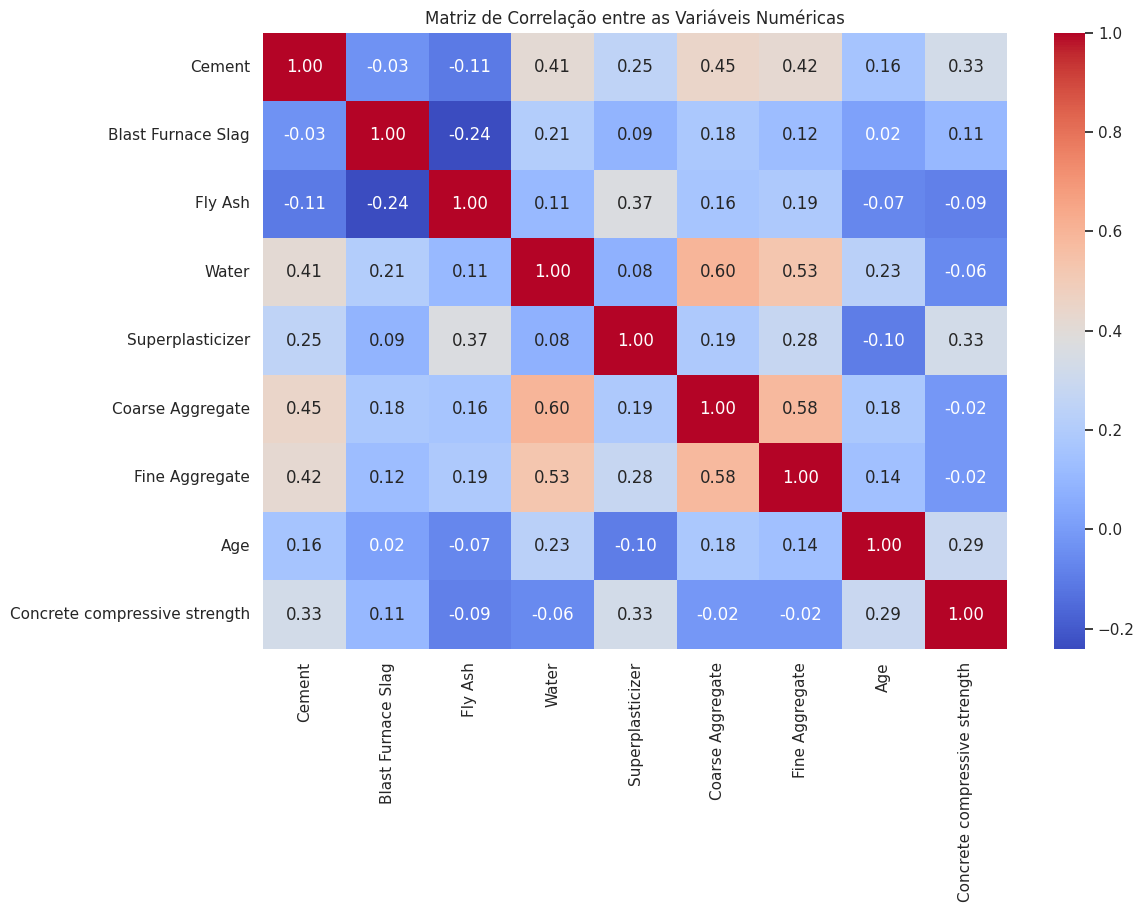

In [ ]:
# Matriz de correlação apenas com colunas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre as Variáveis Numéricas')
plt.show()

Constatação:
A matriz de correlação revela que os fatores mais associados à resistência do concreto são: cimento (correlação = 0.33), superplastificante (0.33) e idade (0.29). Embora essas variáveis apresentem os maiores coeficientes de correlação, os valores são moderados a fracos, indicando que a relação linear entre cada uma delas e a resistência do concreto, quando analisada isoladamente, não é forte.

Além disso, a variável água apresenta uma correlação ligeiramente negativa (-0.06), sugerindo um efeito contrário sobre a resistência, ainda que de forma muito fraca.

Esses resultados indicam que a resistência do concreto não depende fortemente de nenhuma variável individual, reforçando a hipótese de que há interações entre variáveis ou relações não lineares envolvidas. Portanto, análises complementares — como regressão múltipla ou modelos mais complexos — serão necessárias para entender melhor os fatores que influenciam a resistência do concreto.

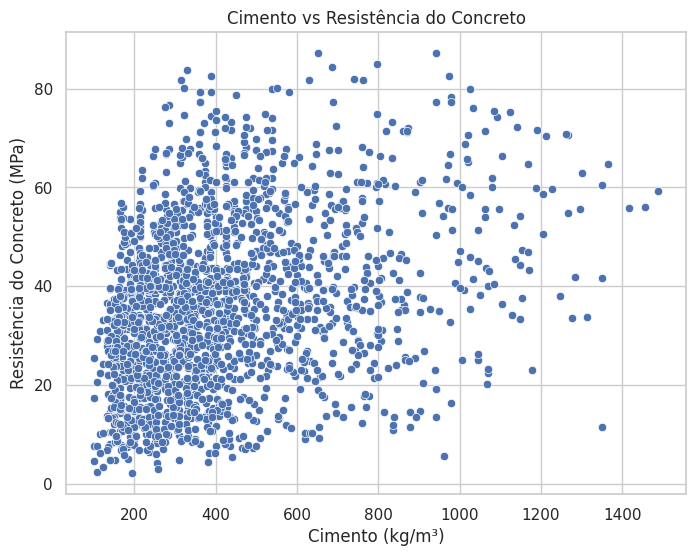

In [ ]:
# Gráfico de dispersão entre Cimento e Resistência
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Cement', y='Concrete compressive strength')
plt.title('Cimento vs Resistência do Concreto')
plt.xlabel('Cimento (kg/m³)')
plt.ylabel('Resistência do Concreto (MPa)')
plt.show()

Constatação: O gráfico de dispersão entre a quantidade de cimento e a resistência do concreto não mostra uma relação linear clara. Embora haja uma leve tendência de que valores mais altos de cimento estejam associados a resistências mais elevadas, a alta dispersão dos dados — especialmente em níveis médios e altos de cimento — indica que essa relação é fraca e pouco consistente.

Isso sugere que a resistência do concreto não depende apenas da quantidade de cimento, e que outros fatores (como proporção água/cimento, tipo de aditivos e tempo de cura) provavelmente têm papel importante no comportamento observado.

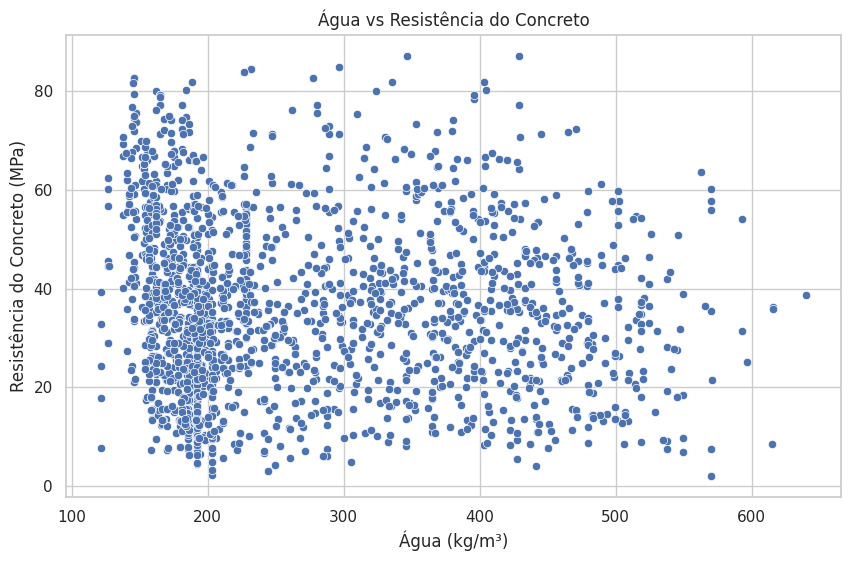

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Water', y='Concrete compressive strength')
plt.title('Água vs Resistência do Concreto')
plt.xlabel('Água (kg/m³)')
plt.ylabel('Resistência do Concreto (MPa)')
plt.grid(True)
plt.show()

Constatação:
A dispersão dos pontos sugere que maiores quantidades de água tendem a reduzir a resistência do concreto. A correlação é fraca e negativa, e a maior concentração de resistências elevadas ocorre em níveis menores de água.

In [ ]:
# Precisei importar este corte de avisos, para deixar os códigos mais limpos.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

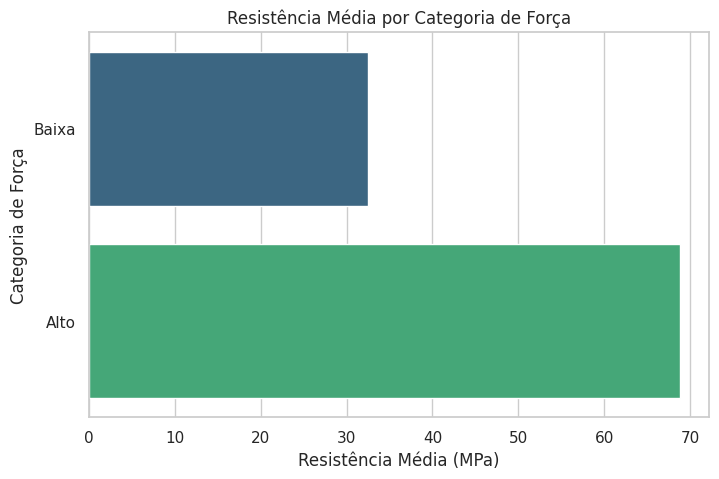

In [ ]:
plt.figure(figsize=(8, 5))
mean_strength_by_category = df.groupby('Strength Category')['Concrete compressive strength'].mean().sort_values()

sns.barplot(x=mean_strength_by_category.values, y=mean_strength_by_category.index, palette='viridis', legend=False)
plt.title('Resistência Média por Categoria de Força')
plt.xlabel('Resistência Média (MPa)')
plt.ylabel('Categoria de Força')
plt.show()


Constatação:
A média de resistência nas amostras categorizadas como "Alto" é significativamente superior em relação às amostras de "Baixa" força. Isso confirma que a categorização está coerente com os valores reais de resistência observados no dataset.

In [ ]:
# Verificando valores nulos
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,9
Strength Category,0


In [ ]:
# Verificar tipos de dados para identificar variáveis categóricas
df.dtypes

,0
Cement,float64
Blast Furnace Slag,float64
Fly Ash,float64
Water,float64
Superplasticizer,float64
Coarse Aggregate,float64
Fine Aggregate,float64
Age,float64
Concrete compressive strength,float64
Strength Category,object


In [ ]:
# A variável Concrete compressive strength, é fundamental para análise. Removi as linhas nulas que são poucas.
df.dropna(subset=['Concrete compressive strength'], inplace=True)

In [ ]:
# Verificando valores nulos pós remoção
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Concrete compressive strength,0
Strength Category,0


In [ ]:
# Verificar valores únicos da coluna
print("Valores únicos antes da codificação:", df['Strength Category'].unique())

# Exibi a contagem de cada valor
print("\nFrequência de cada categoria:")
print(df['Strength Category'].value_counts())

Valores únicos antes da codificação: ['Alto' 'Baixa']

Frequência de cada categoria:
Strength Category
Baixa    1831
Alto      189
Name: count, dtype: int64


In [ ]:
# Apliquei One-Hot Encoding com drop_first=True e transformei em inteiro
dummies = pd.get_dummies(df['Strength Category'], drop_first=True).astype(int)

# Ajustei a coluna dummy, para manter claro o valor codificado
dummies.columns = ['Strength Category_Baixa']

# Substitui a coluna original pela dummy no DataFrame
df = df.drop('Strength Category', axis=1)
df = pd.concat([df, dummies], axis=1)

In [ ]:
# Valores nulos após os tratamento
print(df.isnull().sum())

# Visualização das primeiras linhas do dataset processado
print(df.head())

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
Strength Category_Baixa          0
dtype: int64
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate    Age  Concrete compressive strength  \
0            1040.0           676.0   28.0                          79.99   
1            1055.0           676.0   28.0                          61.89   
2  

In [ ]:
# Apenas conferência
df.dtypes

,0
Cement,float64
Blast Furnace Slag,float64
Fly Ash,float64
Water,float64
Superplasticizer,float64
Coarse Aggregate,float64
Fine Aggregate,float64
Age,float64
Concrete compressive strength,float64
Strength Category_Baixa,int64


In [ ]:
# Variável de interesse, resistência à compressão do concreto
X = df.drop('Concrete compressive strength', axis=1)
y = df['Concrete compressive strength']

In [ ]:
# Dividi os dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)

print("Random Forest Regressor")
print(f"R²:  {rf_r2:.4f}")
print(f"MAE: {rf_mae:.4f}")

Random Forest Regressor
R²:  0.8153
MAE: 5.1772


In [ ]:
# Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

lr_r2 = r2_score(y_test, lr_preds)
lr_mae = mean_absolute_error(y_test, lr_preds)

print("Regressão Linear")
print(f"R²:  {lr_r2:.4f}")
print(f"MAE: {lr_mae:.4f}")

Regressão Linear
R²:  0.5145
MAE: 9.3881


O modelo Random Forest Regressor apresentou desempenho significativamente superior à Regressão Linear, com R² de 0.8153 e MAE de 5.18, indicando boa capacidade de previsão e baixo erro médio. Já a Regressão Linear obteve R² de apenas 0.5145 e MAE de 9.39, demonstrando menor precisão. Isso mostra que o Random Forest é mais adequado para o problema, por capturar melhor as relações complexas entre os materiais e a resistência do concreto.

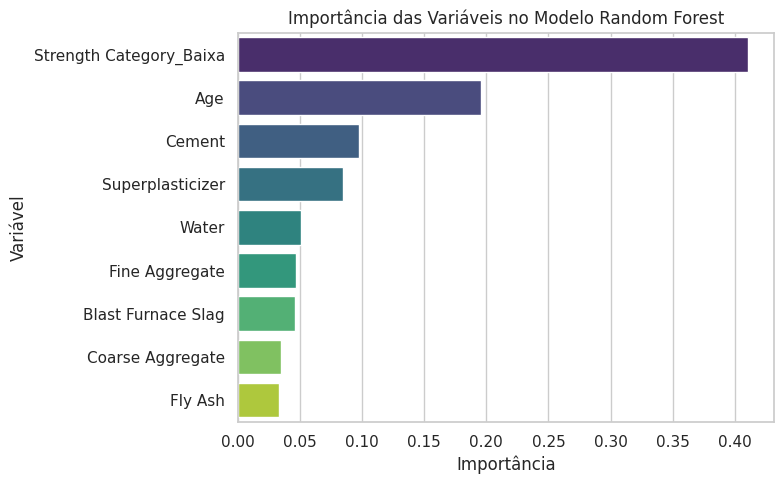

In [ ]:
# Importância das variáveis
importances = rf_model.feature_importances_
feature_names = X.columns

# DataFrame com resultados
feat_imp = pd.DataFrame({'Variável': feature_names, 'Importância': importances})
feat_imp = feat_imp.sort_values(by='Importância', ascending=False)

# Plot da importância
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_imp, x='Importância', y='Variável', palette='viridis')
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

In [ ]:
# Informações para previsão ('Strength Category_Baixa' = 0, dado não foi informado)
nova_amostra = pd.DataFrame([{
    'Cement': 550,
    'Blast Furnace Slag': 150,
    'Fly Ash': 0,
    'Water': 180,
    'Superplasticizer': 2.5,
    'Coarse Aggregate': 1000,
    'Fine Aggregate': 700,
    'Age': 25,
    'Strength Category_Baixa': 0
}])

# Previsão
predicted_strength = rf_model.predict(nova_amostra)

print(f"Resistência prevista do concreto: {predicted_strength[0]:.2f} MPa")

Resistência prevista do concreto: 71.02 MPa


In [ ]:
# Informações para previsão ('Strength Category_Baixa' = 1, dado não foi informado)
nova_amostra = pd.DataFrame([{
    'Cement': 550,
    'Blast Furnace Slag': 150,
    'Fly Ash': 0,
    'Water': 180,
    'Superplasticizer': 2.5,
    'Coarse Aggregate': 1000,
    'Fine Aggregate': 700,
    'Age': 25,
    'Strength Category_Baixa': 1
}])

# Previsão
predicted_strength = rf_model.predict(nova_amostra)

print(f"Resistência prevista do concreto: {predicted_strength[0]:.2f} MPa")

Resistência prevista do concreto: 47.99 MPa


Simulei com a coluna 'Strength Category' tanto alta, como baixa, pois não foi informada nos dados para previsão, e faz parte do conjunto de dados do modelo que foi criado, sendo o de maior peso, inclusive.